## Ejericios de estadistica utilizando peticiones por medio de SQL

In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Importar el archivo 'player_valuations' del link de GitHub de la profesora.

In [8]:
data_player = pd.read_csv('./datos/player_valuations.csv')
# Se va a mostrar los 5 primeros datos
data_player.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


Cambiar nombre de las columnas - renombrar campos

In [12]:
data_player.rename(columns={'precio_en_euros' : 'PrecioEnEuros', 'player_id' : 'JugadorId', 'date' : 'Fecha', 'current_club_id' : 'ClubRecurrenteId', 'player_club_domestic_competition_id' : 'JugadorDomesticoCompetenciaClubId'}, inplace=True)
data_player.head()

,JugadorId,Fecha,PrecioEnEuros,ClubRecurrenteId,JugadorDomesticoCompetenciaClubId
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


Ordenar el DataFrame de manera descendente

In [13]:
df_sorted = data_player.sort_values(by='PrecioEnEuros', ascending=False)
df_sorted

,JugadorId,Fecha,PrecioEnEuros,ClubRecurrenteId,JugadorDomesticoCompetenciaClubId
292158,342229,2019-12-19,200000000,583,FR1
268400,342229,2019-06-03,200000000,583,FR1
252371,342229,2018-12-17,200000000,583,FR1
443838,418560,2023-06-20,180000000,281,GB1
328329,342229,2020-10-15,180000000,583,FR1
...,...,...,...,...,...
456637,221815,2023-10-25,10000,1429,IT1
458037,55869,2023-12-04,10000,6676,GR1
458031,19987,2023-12-04,10000,2672,GR1
388267,621282,2022-02-01,10000,1005,IT1


Organizar el DataFrame de manera ascendente

In [14]:
data_player_ordered = data_player.sort_values(by='PrecioEnEuros', ascending=True)
data_player_ordered

,JugadorId,Fecha,PrecioEnEuros,ClubRecurrenteId,JugadorDomesticoCompetenciaClubId
15338,60096,2008-03-17,0,2696,RU1
370966,36237,2021-10-16,10000,68608,PO1
429529,621277,2023-02-06,10000,1005,IT1
429511,456650,2023-02-06,10000,4171,IT1
429524,537142,2023-02-06,10000,1005,IT1
...,...,...,...,...,...
460596,342229,2023-12-18,180000000,583,FR1
426832,342229,2022-12-23,180000000,583,FR1
268400,342229,2019-06-03,200000000,583,FR1
292158,342229,2019-12-19,200000000,583,FR1


# Estadistica Descriptiva

### Resumen estadístico básico

In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_player_ordered.describe()

,JugadorId,PrecioEnEuros,ClubRecurrenteId
count,464782.000,464782.000,464782.000
mean,204484.605,2359657.620,4060.930
std,186128.543,6666213.585,9516.104
min,10.000,0.000,3.000
25%,56841.000,200000.000,369.000
50%,149526.000,500000.000,1010.000
75%,297772.000,1500000.000,2969.000
max,1186012.000,200000000.000,83678.000


### Discriminar datos 

In [ ]:
# traer la media - promedio

df_discriminate = data_player_ordered['PrecioEnEuros'].mean()
df_discriminate

np.float64(2359657.620129437)

In [ ]:
# traer la mediana - dato del medio

df_discriminate = data_player_ordered['PrecioEnEuros'].median()
df_discriminate

np.float64(500000.0)

In [ ]:
# traer la moda - elemento que mas se repite

df_discriminate = data_player_ordered['PrecioEnEuros'].mode()
df_discriminate

0    300000
Name: PrecioEnEuros, dtype: int64

### Graficar datos

### Cuartiles : Se encarga de administar los grupos de datos | 25% | 50% | 75%

1. Primer Grafico

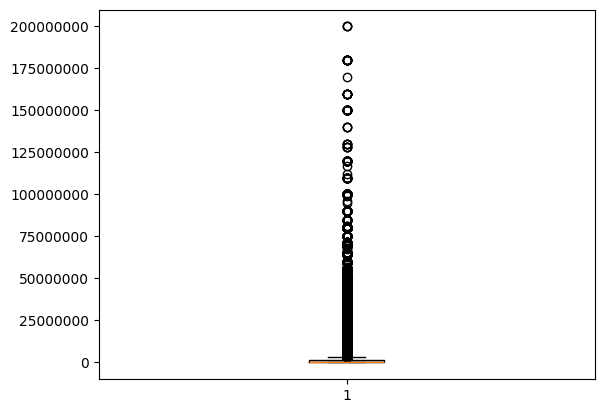

In [25]:
import matplotlib.pyplot as plt

plt.ticklabel_format(style='plain', axis='y')

plt.boxplot(data_player_ordered['PrecioEnEuros'])
plt.show()

### Histograma : Representación en forma de barras.

El histograma depende del tipo de dato a graficar

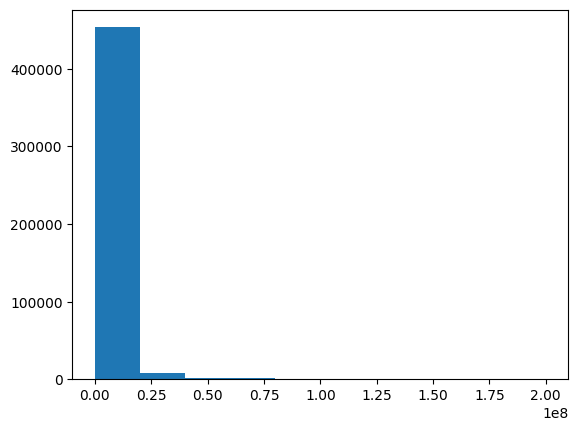

In [27]:
plt.hist(data_player_ordered['PrecioEnEuros'], bins=10)
plt.show()

In [30]:
Q1 = data_player_ordered['PrecioEnEuros'].quantile(0.25)
Q3 = data_player_ordered['PrecioEnEuros'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound) # sumar valores
print(upper_bound) # restar valores

-1750000.0
3450000.0


In [37]:
df = data_player_ordered
df_filtered = df[(df['PrecioEnEuros'] >= lower_bound ) & (df['PrecioEnEuros'] <= upper_bound)]
df_filtered

,JugadorId,Fecha,PrecioEnEuros,ClubRecurrenteId,JugadorDomesticoCompetenciaClubId
15338,60096,2008-03-17,0,2696,RU1
370966,36237,2021-10-16,10000,68608,PO1
429529,621277,2023-02-06,10000,1005,IT1
429511,456650,2023-02-06,10000,4171,IT1
429524,537142,2023-02-06,10000,1005,IT1
...,...,...,...,...,...
15355,18644,2008-03-19,3400000,2687,ES1
15484,40433,2008-03-31,3400000,46,IT1
15560,15762,2008-04-04,3400000,11282,TR1
15574,44027,2008-04-04,3400000,1084,ES1


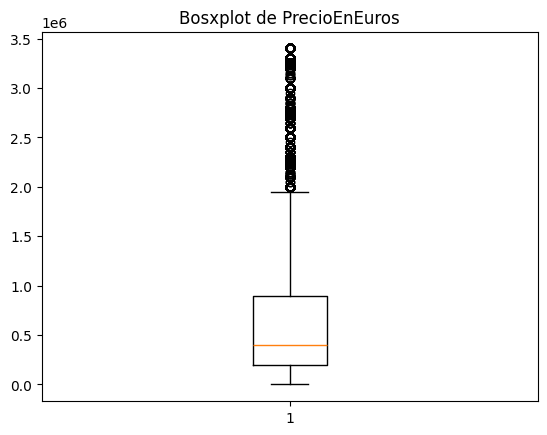

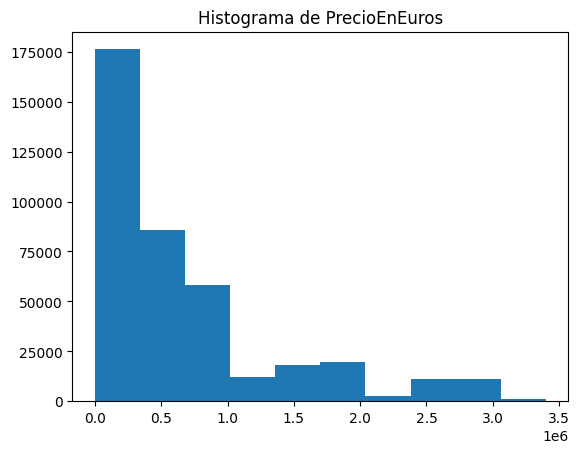

In [38]:
plt.boxplot(df_filtered['PrecioEnEuros'])
plt.title('Bosxplot de PrecioEnEuros')
plt.show()

plt.hist(df_filtered['PrecioEnEuros'], bins=10)
plt.title('Histograma de PrecioEnEuros')
plt.show()